Ball in a box <br>
Simulation 477 <br>
By Grant Smith and Leo Petersen

Heavily inspired by Sam's presentation last week, we used a class based approach to store our ball. This has two main benefits: First, it allows us to define all methods we want our ball to capable of, like being animated and plotted, as well as having a "memory" of the locations it's been in order make these operations easier. Likewise, it makes scaling our code, such as having multiple balls in a box, much easier as we do not need to hardcode structures like memory or radius, they will be created and seperated automatically as we create ball classes. 

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

class Ball:
    # Set up the ball with initial position and velocity
    def __init__(self, position_x, position_y, velocity_at_x, velocity_at_y, radius):
        self.position_x = position_x
        self.position_y = position_y
        self.velocity_at_x = velocity_at_x
        self.velocity_at_y = velocity_at_y
        self.radius = radius
        self.x_memory = []
        self.y_memory = []

    def add_to_memory(self):
        self.x_memory.append(self.position_x)
        self.y_memory.append(self.position_y)

    def get_x_memory(self):
        return self.x_memory

    def get_y_memory(self):
        return self.y_memory

    # Returns the state as an array [x,y,vx,vy]
    def state(self):
        return np.array([self.position_x, self.position_y, self.velocity_at_x, self.velocity_at_y])

    # Plots the path the ball took
    def plot(self, plot):
        plot.plot(self.x_memory, self.y_memory, "k")

    # pass in two subplots from plt.subplots()
    def animate(self, figure, axis):        
        ball_circle = patches.Circle((self.x_memory[0], self.y_memory[0]), self.radius, color="blue")
        axis.add_patch(ball_circle)
        
        def animate(i):
            ball_circle.center = (self.x_memory[i], self.y_memory[i])
            return (ball_circle,)
        
        return FuncAnimation(figure, animate, frames = len(self.x_memory), interval = 1, blit = True)

    # X is an array [x,y,vx,vy], this is done to make it easier to use euler
    def update_state(self, X):
        self.position_x = X[0]
        self.position_y = X[1]
        self.velocity_at_x = X[2]
        self.velocity_at_y = X[3]


However, we choose to kept to keep the physics seperate from the ball, mainly due to time constraints. We also define the wall here, note that our implementation of the wall does not currently support any scaliablity due to hardcoded restrictions. We also choose a fairly straightfoward solution with a conditional to reverse its given velocity if its outside of its given bounds. This is not a problem given a low enough dt. 

In [8]:
def euler(x, f, dt):
    """
    INPUTS:
        x is an array, in this problem assume it contains [x,y,vx,vy],
            this is the 'state' of the ball
        f is a function, you have written that seperately to encode the
            physics of the ball bouncing in a box.
        dt is the time step for the simulation.
    OUTPUTS:
        an array, corresponding to the updated version of the input x
    """
    return x + f(x) * dt

def box_ball(x, radius):
    """
    INPUTS:
        x is an array, in this problem assume it contains [x,y,vx,vy],
            this is the 'state' of the ball
    OUTPUTS:
        an array, it's entries need be constructed such that the constraints of
            the box are observed and the way Euler's method is written in `euler`
            works correctly.
    """
    # Unpack state vector
    pos_x, pos_y, vel_x, vel_y = x

    # Check wall collisions and flip velocities
    # Right wall (x > 1) or Left wall (x < -1)
    if pos_x > 1 - radius or pos_x < -1 + radius:
        x[2] = -vel_x
    # Top wall (y > 1) or Bottom wall (y < -1)
    if pos_y > 1 - radius or pos_y < -1 + radius:
        x[3] = -vel_y

    # Return derivatives: [dx/dt, dy/dt, dvx/dt, dvy/dt]
    # dx/dt = vx, dy/dt = vy, no acceleration so dvx/dt = 0, dvy/dt = 0
    return np.array([x[2], x[3], 0, 0])

This is what it looks like to define the initial ball object. We extended the code a little more for presentation purposes. 

In [9]:
vx = 7
vy = -8
x = 0
y = 0
x0 = np.array([x, y, vx, vy])
ball = Ball(x0[0], x0[1], x0[2], x0[3], radius=0.04)

This is what an inital simulation would look like. Note that the main purpose of this simulation is to update the balls *x_memory* and *y_memory* values, as that is what we use for plotting an animation. 

In [10]:
dt = 0.001
end_time = 100

# Storage for plotting

# Main simulation loop
t = 0
while t < end_time:
    # Get current state and store position
    ball.add_to_memory()

    # Update state using euler
    new_state = euler(ball.state(), lambda x: box_ball(x, ball.radius), dt)
    ball.update_state(new_state)

    t += dt

As mentioned above, balls can plot themselves using a method if the name of the plot is passed in as input. We assume the ball to have a radius of .2, which is why it does not come in contact with the box we define. Note that ours is significantly more compressed than the example because we use a smaller value of dt. 

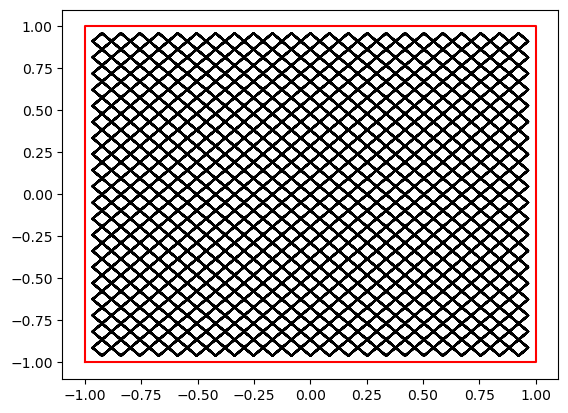

In [11]:
plt.plot([-1,-1,1,1,-1],[-1,1,1,-1,-1],'r')
ball.plot(plt)

Balls can also animate themselves, though the animation process requires a slightly more complex box to be created. (Note the jyputer notebook does not support our animation method, so please run the boxball_radius file instead). Here you can see how the ball (with a defined radius) interacts with the box. It appears to bounce whenever it touches the box due to our low dt setting. Upon testing the dt setting, increasing the dt will increase the speed at which the ball seems to move. We propose this is due to the ball having to move a greater distance (which is computed in the Euler function) in a shorter period of time (a frame). 

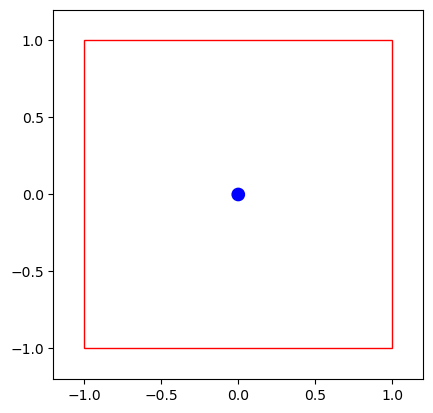

In [12]:
## The following is brought to you by Claude ##
### ANIMATION (uses same X, Y data from above) ###
# Blitting redraws only the ball each frame instead of the whole figure
# Set up the inital box
fig, ax = plt.subplots()
box = patches.Rectangle((-1, -1), 2, 2, edgecolor='red', facecolor='none')
ax.add_patch(box)
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_aspect("equal")

anim = ball.animate(fig, ax)
plt.show()